In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tf.keras.losses import sparse_categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50, MobileNet
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import pandas as pd
import shutil
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [2]:
img_height, img_width = 128, 128
batch_size = 12
train_data_dir = "Dataset2/"
test_data_dir = "Test/"

# Create test directory and move 10% of the data to this directory
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        test_class_dir = os.path.join(test_data_dir, class_name)
        os.makedirs(test_class_dir)
        files = os.listdir(class_dir)
        n_test = int(len(files) * 0.1)
        test_files = files[:n_test]
        for test_file in test_files:
            src = os.path.join(class_dir, test_file)
            dst = os.path.join(test_class_dir, test_file)
            shutil.move(src, dst)

# Create data generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                
                                                ) 

Found 13333 images belonging to 4 classes.
Found 5711 images belonging to 4 classes.
Found 2114 images belonging to 4 classes.


In [12]:
base_model=ResNet50(include_top=False,weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(4,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,
          epochs=25,
          batch_size=16,
          validation_data=valid_generator)

model.save("demo1/resnet.h5")

Epoch 1/25
1112/1112 [==============================] - 686s 613ms/step - loss: 1.1046 - accuracy: 0.5471 - val_loss: 1.0090 - val_accuracy: 0.6032
Epoch 2/25
1112/1112 [==============================] - 643s 578ms/step - loss: 1.0041 - accuracy: 0.5899 - val_loss: 0.9361 - val_accuracy: 0.6160
Epoch 3/25
1112/1112 [==============================] - 640s 576ms/step - loss: 0.9580 - accuracy: 0.6047 - val_loss: 0.9969 - val_accuracy: 0.5636
Epoch 4/25
1112/1112 [==============================] - 613s 552ms/step - loss: 0.9212 - accuracy: 0.6161 - val_loss: 0.9735 - val_accuracy: 0.5932
Epoch 5/25
1112/1112 [==============================] - 619s 557ms/step - loss: 0.8990 - accuracy: 0.6254 - val_loss: 0.8615 - val_accuracy: 0.6452
Epoch 6/25
1112/1112 [==============================] - 614s 552ms/step - loss: 0.8902 - accuracy: 0.6311 - val_loss: 0.8591 - val_accuracy: 0.6454
Epoch 7/25
1112/1112 [==============================] - 5998s 5s/step - loss: 0.8770 - accuracy: 0.6293 - val_lo

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [21]:
modelAccuracy = model.evaluate(test_generator, verbose=0)
print('Test Accuracy is {}%'.format(modelAccuracy[1] * 100))
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)


Test Accuracy is 66.46168231964111%


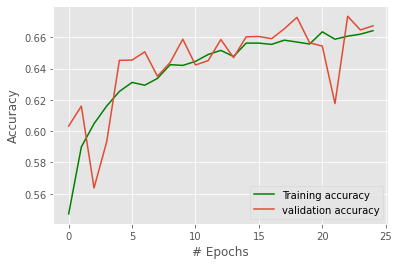

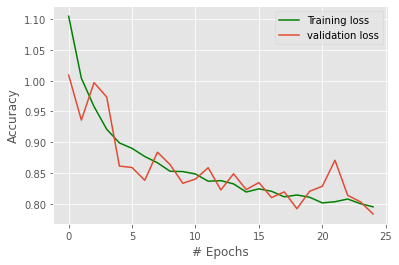

0.6642165780067444


In [14]:

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/resnet_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/resnet_loss.png")
plt.show()


acc=history.history['accuracy'][-1]
print(acc)


In [25]:
class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
y_pred = model.predict(test_generator)
print(class_names[np.argmax(y_pred[2])])

Viral Pneumonia


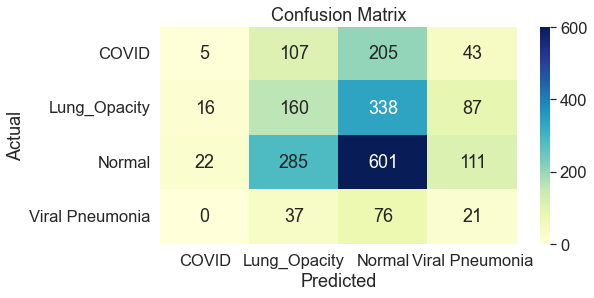

In [16]:
y_pred = model.predict(test_generator) # predict on test_generator

y_pred_classes = np.argmax(y_pred, axis=1) # obtain predicted class labels

conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)

class_names = list(test_generator.class_indices.keys())

conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

plt.figure(figsize=(8,4))
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

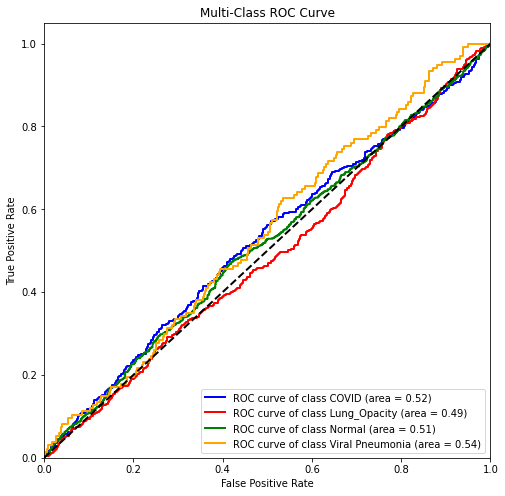

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import keras

# Load the saved model
model = keras.models.load_model('demo1/resnet.h5')

class_names = list(test_generator.class_indices.keys())
# Make predictions on the test data
y_pred_proba = model.predict(test_generator)

# Calculate the AUC for each class
lb = LabelBinarizer()
lb.fit(test_generator.classes)
y_true = lb.transform(test_generator.classes)
aucs = []
for i in range(test_generator.num_classes):
    auc = roc_auc_score(y_true[:, i], y_pred_proba[:, i])
    aucs.append(auc)
    
# Plot the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = aucs[i]
    
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(test_generator.num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import classification_report

# Generate predictions for all test data
y_pred = model.predict_generator(test_generator)

# Extract predicted labels batch by batch
y_pred_classes = []
for i in range(len(test_generator)):
    x_batch, y_batch = next(test_generator)
    y_pred_batch = model.predict(x_batch)
    y_pred_batch_classes = np.argmax(y_pred_batch, axis=1)
    y_pred_classes.extend(y_pred_batch_classes)

# Concatenate predicted labels for all test data
y_true = test_generator.classes
y_pred_classes = np.array(y_pred_classes)

# Print classification report
target_names = test_generator.class_indices.keys()
print(classification_report(y_true, y_pred_classes, target_names=target_names))


C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


                 precision    recall  f1-score   support

          COVID       0.18      0.02      0.04       360
   Lung_Opacity       0.27      0.26      0.27       601
         Normal       0.49      0.60      0.54      1019
Viral Pneumonia       0.07      0.14      0.10       134

       accuracy                           0.38      2114
      macro avg       0.26      0.26      0.24      2114
   weighted avg       0.35      0.38      0.35      2114



In [20]:
y_true = test_generator.classes
# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Precision: 0.344
Recall: 0.365
F1-score: 0.338
